In [4]:
import pickle
import matplotlib.pyplot as plt
import math

In [5]:
prothash = pickle.load( open("../prot_hashtables/prothashtable_k3.p", "rb") )

In [7]:
print(prothash['MQK'])

{'HHH': 3736, 'ECC': 139, 'CCC': 1153, 'CCH': 136, 'EEE': 303, 'HCC': 204, 'CEE': 184, 'CCE': 696, 'CHH': 41, 'CEC': 134, 'EEC': 41, 'HHC': 286, 'ECH': 2, 'CEH': 19, 'HCH': 14, 'ECE': 3, 'EEH': 1}


In [8]:
# Create a histgram of the distrobution of number of associated secondary structures
countvec = []
for key, value in prothash.items():
    countvec.append(len(value))
    #print(len(value))
    #print(key, value)

Text(0, 0.5, 'Frequency')

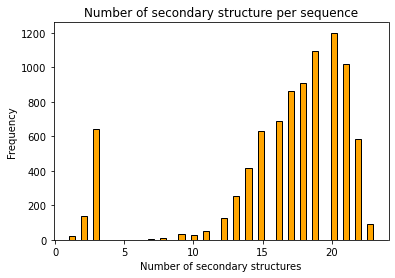

In [9]:
plt.hist(countvec, bins=50, color="orange", edgecolor="black")
plt.title("Number of secondary structure per sequence")
plt.xlabel("Number of secondary structures")
plt.ylabel("Frequency")

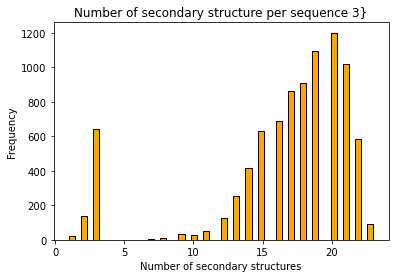

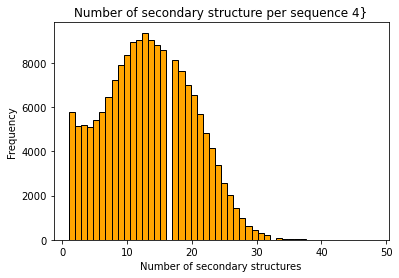

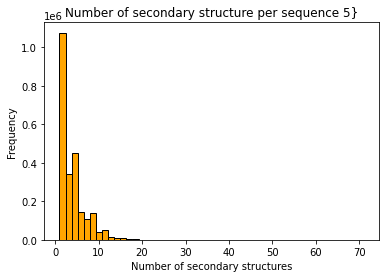

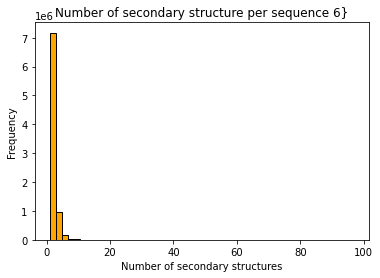

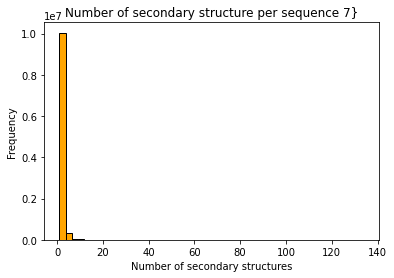

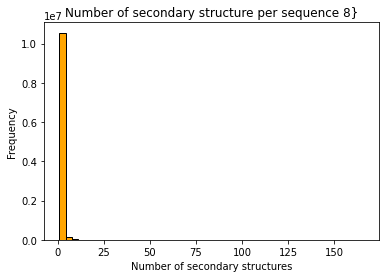

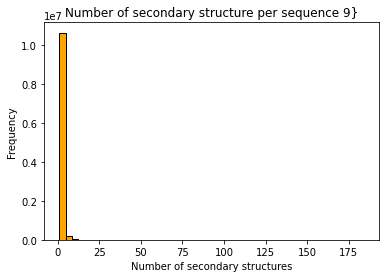

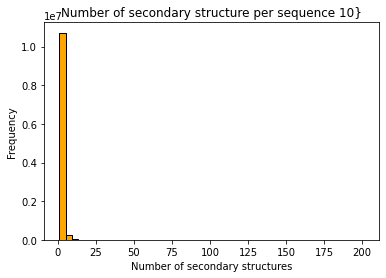

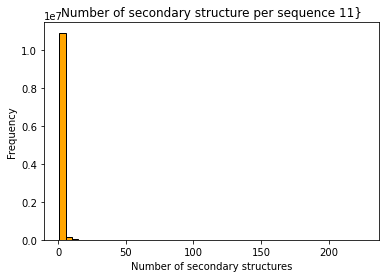

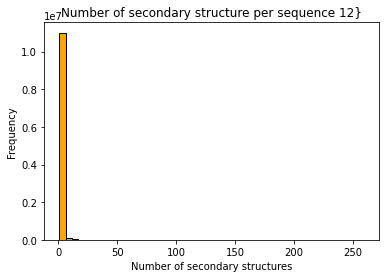

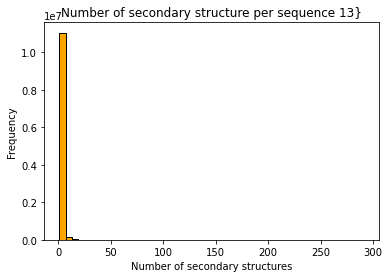

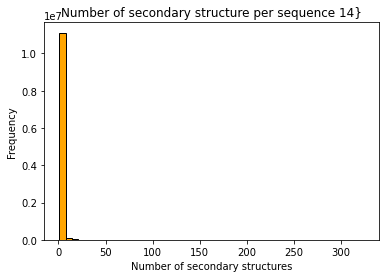

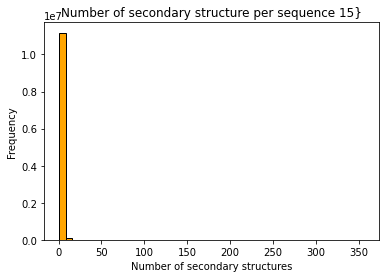

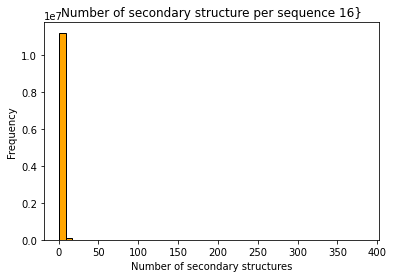

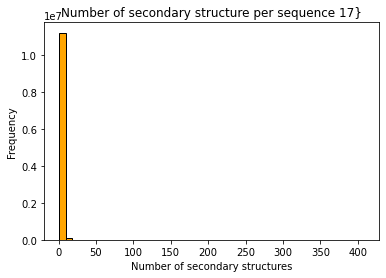

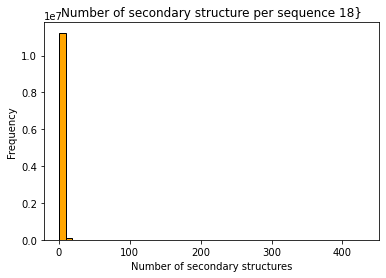

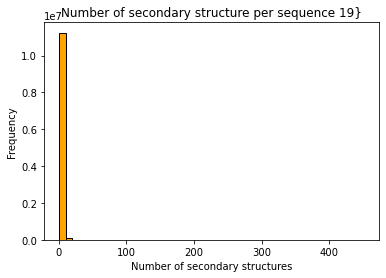

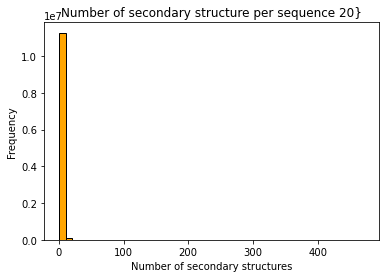

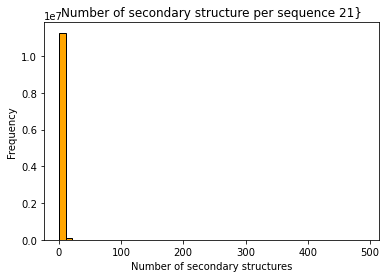

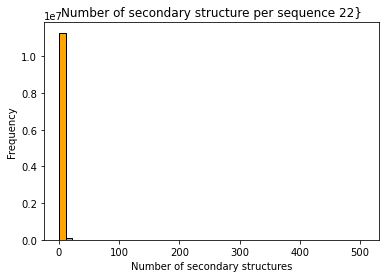

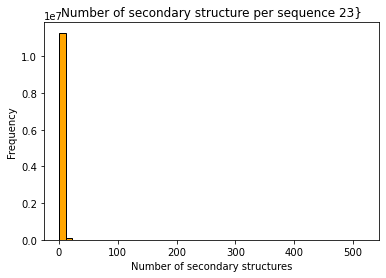

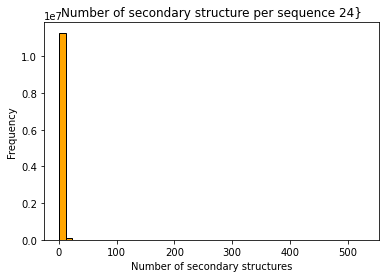

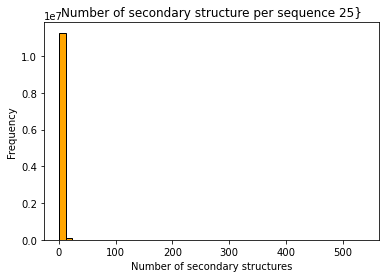

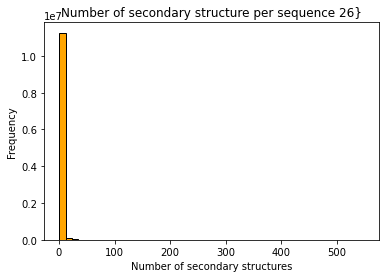

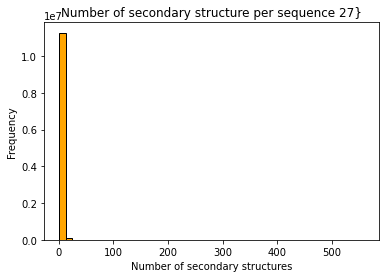

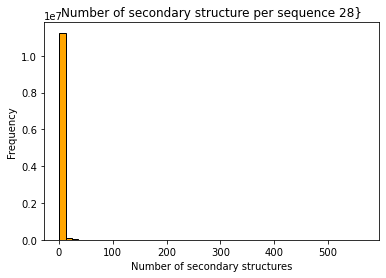

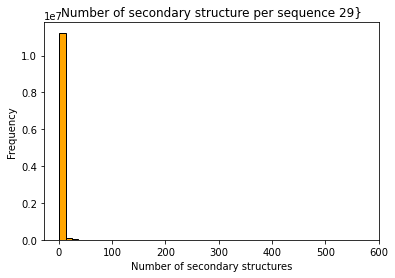

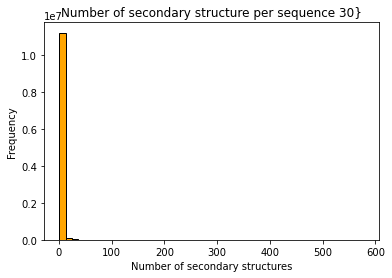

In [11]:
for k in range(3,31):
    prothash = pickle.load( open(f"../prot_hashtables/prothashtable_{k}.p", "rb") )
    # Create a histgram of the distrobution of number of associated secondary structures
    countvec = []
    for key, value in prothash.items():
        countvec.append(len(value))
    # plot
    plt.hist(countvec, bins=50, color="orange", edgecolor="black")
    plt.title(f"Number of secondary structure per sequence {k}}}")
    plt.xlabel("Number of secondary structures")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
"""
# turn hash table into probabilities
def turntoprobs(hash_table):
   # 
   # turns values from counts to probs
   # 
    new_hash_table = {}
    for key, value in hash_table.items():
        
        
    return new_hash_table
"""

# get kmers 
def get_kmers(primary_prot_seq, kmer_length):
    """
    returns an array of the input string as chunks length k
    """
    kmer_array = [primary_prot_seq[i:i+kmer_length] 
                  for i in range(len(primary_prot_seq)-(kmer_length-1))]  
    return kmer_array

# Algorithm
def debruijnextend_v1(primary_seq, k):
    """
    This method takes in a primary protein sequence annd returns the
    secondary structure predicted with the highest probability.
    INPUT: primary protein sequence (type: string), 
           pickled hash table (type: python dict),
           kmer length (type: int)
    OUTPUT: 3-based secondary structure (using CEH, type: string) 
    """
    primary_karray = get_kmers(primary_seq, k)
    hash_table = pickle.load(open(f"prothashtable_{k}.p", "rb"))
    
    
    ###
    # STEP 1: Find corresponding secondary structures
    ###
    potential_secondaries = {} # this will have all layers for our graph
    for kmer in primary_karray:
        diff = k - 1 # this is the overlap to check
        
        # turn into probalities 
        temp_dict = {}
        summ = 0
        for key, value in hash_table[kmer].items():
            summ += value
            temp_dict[key] = value
        for key, value in temp_dict.items():
            temp_dict[key] = (-1) * math.log(round(value / summ, 5))
            
        # add potential secondarys structure to new dictionary
        potential_secondaries[kmer] = temp_dict
        
    ###
    # STEP 2: Connect the layers, use dynamic programming per layer
    ###
    stitchextend_dict = potential_secondaries[primary_karray[0]].copy() #initialize with first
    for kmer_i in range(1,len(primary_karray)): # looping through the layers
        for seq, prob in stitchextend_dict.items(): # loop through extended sequences
            kmer_lay = primary_karray[kmer_i]
            for kmer_in_layer, kmer_prob in potential_secondaries[kmer_lay].items(): # loop through kmers per layer
                end_of_ext = seq[-(k-1):] # last k-1
                start_of_kmer = kmer_in_layer[:k-1] # up to k-1
                if end_of_ext == start_of_kmer:
                    # if equal, THEN STITCH AND EXTEND
                    extended_seq = seq + kmer_in_layer[-1]
                    extended_prob = prob + kmer_prob
                    del stitchextend_dict[seq] # delete old
                    stitchextend_dict[extended_seq] = extended_prob # add new
    
    ####
    # STEP 3: choose the top 10
    ####
    return stitchextend_dict
                    
print(debruijnextend_v1('RRWFWR', 5))

{'CCCCCCCCCC': 5.49311144359055}


In [ ]:
get_kmers('RRWFWR',3)

['ATA', 'TAC', 'ACT', 'CTA', 'TAT', 'ATA', 'TAC']

In [ ]:
k = 5
seq = "ATACTATAC"
end_of_ext = seq[:k-1]
print(end_of_ext)

ATAC
